In [13]:
import numpy as np
import seaborn as sns
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('default') # 使用默认样式
from tools_2D import *
from shape_fns import *
from Elements import *
from Mesh import create_mesh, Boundary
import pickle
from scipy.interpolate import griddata

with open("Data/data.pkl", "rb") as f:
    data_ori = pickle.load(f)
path = 'Data'

In [14]:
def draw(elements_list, dir ='xy',type = 'disp'):
    refine = 3
    global_min = min([np.min([test_element(xy[0], xy[1], dir, type) for xy in test_element.sample_points(refine)]) for test_element in elements_list])
    global_max = max([np.max([test_element(xy[0], xy[1], dir, type) for xy in test_element.sample_points(refine)]) for test_element in elements_list])
    for test_element in elements_list:
        test_mapping = test_element.mapping(refine)
        test_inputs = test_element.sample_points(refine)
        test_output = [test_element(xy[0], xy[1],dir, type) for xy in test_inputs]
        test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)
        plt.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                    test_mapping[:, 0].max(),
                                    test_mapping[:, 1].min(),
                                    test_mapping[:, 1].max()),
                                    origin='lower', aspect='auto',
                                    interpolation='none', cmap='jet',
                                        vmin=global_min, vmax=global_max)
            # 绘制元素的边界
        vertices = test_element.vertices
        vertices = np.vstack([vertices, vertices[0]])  # 将第一个顶点再次添加到数组的末尾，以便封闭形状
        vertices_x, vertices_y = zip(*vertices)  # 解压顶点坐标
        plt.plot(vertices_x, vertices_y,  color='white', linewidth=0.7)  # 使用黑色线绘制边界，并使用小圆点表示顶点

    plt.xlim(0, 40)
    plt.ylim(0, 40)
    # Display the color bar
    plt.colorbar()
    plt.legend()
    if type == 'disp':
        type_str = 'U'
    elif type == 'strain':
        type_str = '\\epsilon'
    elif type == 'stress':
        type_str = '\\sigma'
    dir_str = "{ %s }" % dir
    # if dir == 'xy':
    #    dir_str = '{xy}'
    # elif dir == 'von':
    #    dir_str = '{von}'
    # else:
    #    dir_str = dir
    plt.title(rf"${type_str}_{dir_str}$")
    plt.show()

def draw_exact(elements_list, a_b, dir ='x'):
    global_min = min([np.min([exact_fn(xy[0], xy[1],a_b, dir) for xy in test_element.mapping(refine)]) for test_element in elements_list])
    global_max = max([np.max([exact_fn(xy[0], xy[1],a_b, dir)for xy in test_element.mapping(refine)]) for test_element in elements_list])

    for i in range(len(elements_list)):
        test_element = elements_list[i]
        test_mapping = test_element.mapping(refine)
        test_output = [exact_fn(xy[0], xy[1],a_b, dir) for xy in test_mapping]
        test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)
        plt.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                            test_mapping[:, 0].max(),
                                            test_mapping[:, 1].min(),
                                            test_mapping[:, 1].max()),
                                            origin='lower', aspect='auto',
                                            interpolation='bilinear',cmap='jet',
                                            vmin=global_min, vmax=global_max)
        # 绘制元素的边界
        vertices = test_element.vertices
        vertices = np.vstack([vertices, vertices[0]])  # 将第一个顶点再次添加到数组的末尾，以便封闭形状
        vertices_x, vertices_y = zip(*vertices)  # 解压顶点坐标
        plt.plot(vertices_x, vertices_y,  color='white', linewidth=0.5)  # 使用黑色线绘制边界，并使用小圆点表示顶点s
    plt.xlim(0, 40)
    plt.ylim(0, 40)
    # Display the color bar
    plt.colorbar()
    dir_str = "{ %s }" % dir
    plt.title(rf"Exact solution: $\sigma_{dir_str}$")
    plt.show()

a_b 0.5
mesh_size 2
mesh_shape Q4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


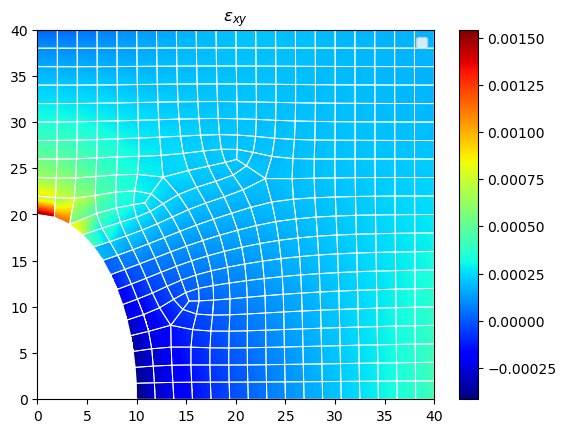

In [15]:
dir ='x'
type = 'strain'
if type == 'disp':
    type_str = 'U'
elif type == 'strain':
    type_str = '\\epsilon'
elif type == 'stress':
    type_str = '\\sigma'
dir_str = "{ %s }" % dir
iii = -1
refine = 3
elements_list = data_ori[iii]['elements_list']
a_b =data_ori[iii]['a_b'] 
data_keys = list(data_ori[iii].keys())[:3]
for key in data_keys:
    print(key, data_ori[iii][key])

# draw(elements_list, dir, type)
# draw(elements_list, 'y', type)
draw(elements_list, 'xy', 'strain')


In [16]:
bugs

NameError: name 'bugs' is not defined

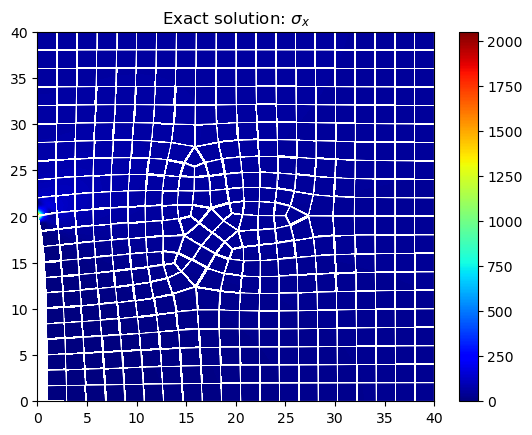

In [ ]:
draw_exact(elements_list,a_b, dir)

In [ ]:
B = np.zeros((3, 5))
B[0]

array([0., 0., 0., 0., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


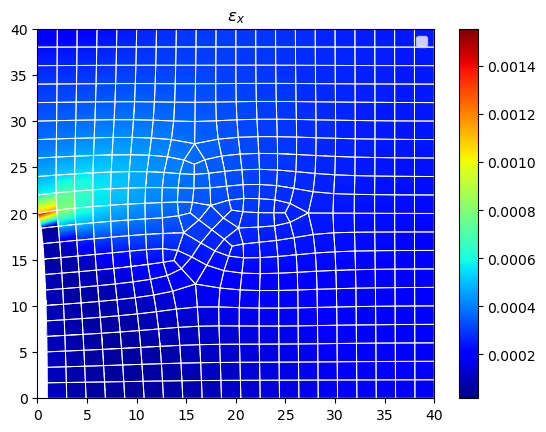

In [ ]:

draw(elements_list, dir, type)

In [ ]:
import math

class Element:
    def __init__(self, vertices):
        self.vertices = vertices

def distance(p1, p2):
    """计算两点之间的距离"""
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def triangle_area(p1, p2, p3):
    """使用海伦公式计算三角形面积"""
    a = distance(p1, p2)
    b = distance(p2, p3)
    c = distance(p1, p3)
    s = (a + b + c) / 2
    return math.sqrt(s * (s - a) * (s - b) * (s - c))

def quadrilateral_area(p1, p2, p3, p4):
    """计算四边形面积，将其分为两个三角形"""
    return triangle_area(p1, p2, p3) + triangle_area(p1, p3, p4)

def calculate_area(element):
    if len(element.vertices) == 3:
        return triangle_area(*element.vertices)
    elif len(element.vertices) == 4:
        return quadrilateral_area(*element.vertices)
    else:
        raise ValueError("Element has an unsupported number of vertices.")

# 示例
triangle = Element([(0, 0), (4, 0), (2, 3)])
quad = Element([(0, 0), (4, 0), (4, 3), (0, 3)])

print(calculate_area(triangle))  # 输出: 6.0
print(calculate_area(quad))     # 输出: 12.0


6.000000000000002
12.0


2050.0


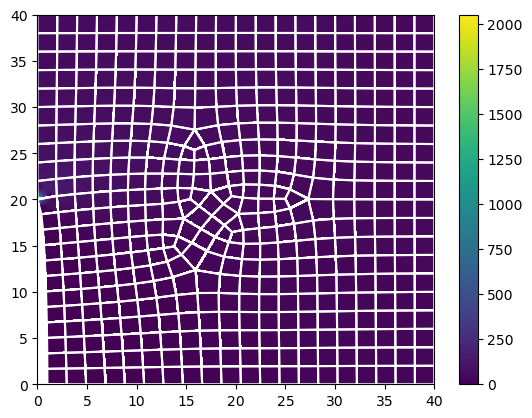

In [ ]:
stress = []
xys = []

global_min = min([np.min([exact_fn(xy[0], xy[1],data_ori[iii]['a_b'], dir) for xy in test_element.mapping(refine)]) for test_element in elements_list])
global_max = max([np.max([exact_fn(xy[0], xy[1],data_ori[iii]['a_b'], dir)for xy in test_element.mapping(refine)]) for test_element in elements_list])
print(global_max)
for i in range(len(elements_list)):
   test_element = elements_list[i]
   test_mapping = test_element.mapping(refine)
   test_output = [exact_fn(xy[0], xy[1],data_ori[iii]['a_b'], dir) for xy in test_mapping]
   test_x, test_y, test_z = grid_to_mat(test_mapping, test_output)
   plt.imshow(test_z, extent=(test_mapping[:, 0].min(),
                                    test_mapping[:, 0].max(),
                                    test_mapping[:, 1].min(),
                                    test_mapping[:, 1].max()),
                                    origin='lower', aspect='auto',
                                    interpolation='bilinear',
                                        vmin=global_min, vmax=global_max)
            # 绘制元素的边界
   vertices = test_element.vertices
   vertices = np.vstack([vertices, vertices[0]])  # 将第一个顶点再次添加到数组的末尾，以便封闭形状
   vertices_x, vertices_y = zip(*vertices)  # 解压顶点坐标
   plt.plot(vertices_x, vertices_y,  color='white')  # 使用黑色线绘制边界，并使用小圆点表示顶点s
plt.xlim(0, 40)
plt.ylim(0, 40)
# Display the color bar
plt.colorbar()


In [ ]:
print(data_ori[iii]['nodes_coord'])

[[1.00000000e+00 1.13570713e-13]
 [2.22044605e-15 2.00000000e+01]
 [0.00000000e+00 4.00000000e+01]
 [4.00000000e+01 4.00000000e+01]
 [4.00000000e+01 0.00000000e+00]
 [9.85876479e-01 3.34948159e+00]
 [9.42241114e-01 6.69870681e+00]
 [8.64655312e-01 1.00473119e+01]
 [7.42605883e-01 1.33945736e+01]
 [5.47335414e-01 1.67382669e+01]
 [9.08144932e-01 8.37311846e+00]
 [6.57610285e-01 1.50671658e+01]
 [8.10268175e-01 1.17211857e+01]
 [9.67933326e-01 5.02414474e+00]
 [3.91257191e-01 1.84056275e+01]
 [9.96487824e-01 1.67475579e+00]
 [0.00000000e+00 3.60000000e+01]
 [0.00000000e+00 3.20000000e+01]
 [0.00000000e+00 2.80000000e+01]
 [0.00000000e+00 2.40000000e+01]
 [0.00000000e+00 3.00000000e+01]
 [0.00000000e+00 3.40000000e+01]
 [0.00000000e+00 3.80000000e+01]
 [0.00000000e+00 2.60000000e+01]
 [0.00000000e+00 2.20000000e+01]
 [3.60000000e+01 4.00000000e+01]
 [3.20000000e+01 4.00000000e+01]
 [2.80000000e+01 4.00000000e+01]
 [2.40000000e+01 4.00000000e+01]
 [2.00000000e+01 4.00000000e+01]
 [1.600000

In [ ]:
elem = data_ori[iii]['elements_list'][12]
print(elem)
elem.mapping(3)

[[20.26362179 18.44044686]
 [20.70276521 20.18978641]
 [19.55722983 20.36570227]
 [18.73994463 19.51356347]]


array([[20.26362179, 18.44044686],
       [19.50178321, 18.97700516],
       [18.73994463, 19.51356347],
       [20.4831935 , 19.31511664],
       [19.81589036, 19.62737475],
       [19.14858723, 19.93963287],
       [20.70276521, 20.18978641],
       [20.12999752, 20.27774434],
       [19.55722983, 20.36570227]])

In [ ]:
jjj = np.zeros((5, 1))
jjj

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])